<a href="https://colab.research.google.com/github/CHIZIGWE/TSK/blob/main/CS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solution Notebook**

# **Data Preprocessing**

In [62]:
#Importing data wrangling and visualisation libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from numpy.ma.core import outer
from decimal import Decimal

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from datetime import  datetime as dt
from dateutil import relativedelta
pd.options.display.float_format = '{:.2f}'.format #To suppress scientific notation

In [63]:
#Loading the Datasets

Deal_Performance = pd.read_excel(r'/content/drive/MyDrive/Captify_Task/deal-performance-data.xlsx') #Deal Performanc Dataset

bid_blue = pd.read_csv(r"/content/drive/MyDrive/Captify_Task/deal-bid-data-bluessp.csv") #Blue SSP dataset

bid_red = pd.read_csv(r"/content/drive/MyDrive/Captify_Task/deal-bid-data-redssp.csv") #Red SSP dataset

In [64]:
#Creating Function to Automate Sanity Check
def sanity_check(Dataset, Dataset_Name):
    print(Dataset_Name, 'Sanity Check: \n\n')
    print(f'{Dataset_Name} Rows and Columns: \n' ,Dataset.shape, '\n')
    print(f'{Dataset_Name} Column information: \n')
    Dataset.info()
    print('\n')
    print(f'{Dataset_Name} Missing information: \n',Dataset.isnull().sum(), '\n')
    print(f'{Dataset_Name} Statistical Summary: \n',Dataset.describe(), '\n')
    print(f'End of {Dataset_Name} sanity check \n')


In [65]:
#Sanity Check for Blue SSP Data
sanity_check(bid_blue, 'Bid Blue')

Bid Blue Sanity Check: 


Bid Blue Rows and Columns: 
 (748, 4) 

Bid Blue Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   deal_id      748 non-null    object 
 1   month        748 non-null    object 
 2   bid_request  748 non-null    float64
 3   bids         748 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 23.5+ KB


Bid Blue Missing information: 
 deal_id        0
month          0
bid_request    0
bids           0
dtype: int64 

Bid Blue Statistical Summary: 
           bid_request           bids
count          748.00         748.00
mean   83372563851.83  6156973885.02
std   104246600250.14  7556392469.17
min            160.00           0.00
25%            160.00           0.00
50%    34921890202.00  3133102090.00
75%   143500000000.00 10501080076.25
max   476000000000.00 37064307785.00 



In [66]:
#Sanity Check for Blue SSP data
sanity_check(bid_blue, 'Bid Blue')

Bid Blue Sanity Check: 


Bid Blue Rows and Columns: 
 (748, 4) 

Bid Blue Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   deal_id      748 non-null    object 
 1   month        748 non-null    object 
 2   bid_request  748 non-null    float64
 3   bids         748 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 23.5+ KB


Bid Blue Missing information: 
 deal_id        0
month          0
bid_request    0
bids           0
dtype: int64 

Bid Blue Statistical Summary: 
           bid_request           bids
count          748.00         748.00
mean   83372563851.83  6156973885.02
std   104246600250.14  7556392469.17
min            160.00           0.00
25%            160.00           0.00
50%    34921890202.00  3133102090.00
75%   143500000000.00 10501080076.25
max   476000000000.00 37064307785.00 



The Datasets are mostly clean, however, in the bid datasets the date ('month') columns have the wrong datatypes. This has be changed for Data integrity purposes

In [67]:
#Converting both to datetime datatypes
bid_red['month'] = pd.to_datetime(bid_red['month'])
bid_blue['month'] = pd.to_datetime(bid_blue['month'])

#Checking that the change has taken place
bid_blue['month'].dtype
print('\n')
bid_red['month'].dtype

dtype('<M8[ns]')

To develop a full picture of the bid metrics, we concatenate both datasets

In [68]:
#Concatenating the bid Datasets
combined_bid = pd.concat([bid_blue, bid_red])

#Sanity Check on the Concatenated Dataset
sanity_check(combined_bid, 'Combined Bid')

Combined Bid Sanity Check: 


Combined Bid Rows and Columns: 
 (1880, 4) 

Combined Bid Column information: 

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1131
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   deal_id      1880 non-null   object        
 1   month        1880 non-null   datetime64[ns]
 2   bid_request  1880 non-null   float64       
 3   bids         1880 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 73.4+ KB


Combined Bid Missing information: 
 deal_id        0
month          0
bid_request    0
bids           0
dtype: int64 

Combined Bid Statistical Summary: 
                                month     bid_request           bids
count                           1880         1880.00        1880.00
mean   2024-02-22 22:56:25.531914752  90597923699.18  5984268721.33
min              2024-01-01 00:00:00          160.00

Exploring the Deal Performance dataset to see opportunities for data manipulation and wrangling.

In [69]:
#creating a bid success column
combined_bid['bid_success_rate'] = combined_bid['bids']/combined_bid['bid_request']
combined_bid['bid_success_rate'] #after inspecting this column we discoveres that some bid success rate were siginificantly above 100%
combined_bid['bids']>combined_bid['bid_request'] #Consequently investigating the bids are higher the bid requests.
combined_bid.drop(combined_bid[combined_bid['bids']>combined_bid['bid_request']].index, inplace= True) #We drop  them to enhance data accuracy

In [70]:
Deal_Performance.head()

,deal_id,deal_name,month,segment_type,ssp,advertiser,vertical,office,tier,media_type,kpi,kpi_value,gross_spend,media_cost,data_revenue,impressions,video_completes,clicks,media_margin
0,Deal_102,Deal_102_Campaign,2024-01-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.19,154.76,109.24,45.52,66474,50812.00,126.30,29.42
1,Deal_102,Deal_102_Campaign,2024-02-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CPC,6.00,153.74,110.30,43.45,9900,12508.00,18.38,28.26
2,Deal_102,Deal_102_Campaign,2024-04-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.10,142.57,101.25,41.32,21614,1.00,21.61,28.98
3,Deal_102,Deal_102_Campaign,2024-05-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CPC,4.00,164.75,97.48,67.26,81433,1.00,24.37,40.83
4,Deal_102,Deal_102_Campaign,2024-06-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.10,172.89,101.11,71.78,89362,41537.00,89.36,41.52


Given that KPIs and their respecive values could form an integral part of the necessary analysis. The respective KPIs within the dataset should become variables alongside the existing variables.

In [71]:
#First we created a pivot based on the advertiser and the various KPIs
pivoted = Deal_Performance.pivot_table(index = 'advertiser', columns = 'kpi', values = 'kpi_value').reset_index()

#Then we Merge this Deal Performance dataframe
Deal_Performance = pd.merge(Deal_Performance, pivoted, how= 'inner', on= 'advertiser')

#The First 5 rows of the new dataframe
Deal_Performance.head()


,deal_id,deal_name,month,segment_type,ssp,advertiser,vertical,office,tier,media_type,kpi,kpi_value,gross_spend,media_cost,data_revenue,impressions,video_completes,clicks,media_margin,CPC,CTR,VTR
0,Deal_102,Deal_102_Campaign,2024-01-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.19,154.76,109.24,45.52,66474,50812.00,126.30,29.42,5.00,0.12,NaN
1,Deal_102,Deal_102_Campaign,2024-02-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CPC,6.00,153.74,110.30,43.45,9900,12508.00,18.38,28.26,5.00,0.12,NaN
2,Deal_102,Deal_102_Campaign,2024-04-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.10,142.57,101.25,41.32,21614,1.00,21.61,28.98,5.00,0.12,NaN
3,Deal_102,Deal_102_Campaign,2024-05-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CPC,4.00,164.75,97.48,67.26,81433,1.00,24.37,40.83,5.00,0.12,NaN
4,Deal_102,Deal_102_Campaign,2024-06-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.10,172.89,101.11,71.78,89362,41537.00,89.36,41.52,5.00,0.12,NaN


Above we can see that the dataframe has successfully incorporated the KPIs as part of the variables. Now we can combine both variables to develop a bigger picture encompassing all three datasets.

In [72]:
Data = pd.merge(Deal_Performance, combined_bid, how= 'inner', on= 'deal_id')

#First five rows of new dataset

print(Data.head())

    deal_id          deal_name    month_x segment_type      ssp    advertiser            vertical office         tier media_type  kpi  kpi_value  gross_spend  media_cost  data_revenue  impressions  video_completes  clicks  media_margin  CPC  CTR  VTR    month_y     bid_request         bids  bid_success_rate
0  Deal_102  Deal_102_Campaign 2024-01-01   Cookieless  BLUESSP  Advertiser_1  Jobs and Education     UK  Growth Tier    Display  CTR       0.19       154.76      109.24         45.52        66474         50812.00  126.30         29.42 5.00 0.12  NaN 2024-01-04 287000000000.00   7902414504              0.03
1  Deal_102  Deal_102_Campaign 2024-01-01   Cookieless  BLUESSP  Advertiser_1  Jobs and Education     UK  Growth Tier    Display  CTR       0.19       154.76      109.24         45.52        66474         50812.00  126.30         29.42 5.00 0.12  NaN 2024-01-06 201000000000.00            0              0.00
2  Deal_102  Deal_102_Campaign 2024-01-01   Cookieless  BLUESSP  Advertis

In [73]:
#Sanity Check for combined dataset

sanity_check(Data, 'Combined Dataset')

Combined Dataset Sanity Check: 


Combined Dataset Rows and Columns: 
 (9590, 26) 

Combined Dataset Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9590 entries, 0 to 9589
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   deal_id           9590 non-null   object        
 1   deal_name         9590 non-null   object        
 2   month_x           9590 non-null   datetime64[ns]
 3   segment_type      9590 non-null   object        
 4   ssp               9590 non-null   object        
 5   advertiser        9590 non-null   object        
 6   vertical          9590 non-null   object        
 7   office            9590 non-null   object        
 8   tier              9590 non-null   object        
 9   media_type        9590 non-null   object        
 10  kpi               9590 non-null   object        
 11  kpi_value         9590 non-null   float64       
 12  gross_spe

Most of the columns have no missing values.

However, given the fact that some of the advertisers do not use all forms of KPIs (CPC. CTR, VTR). There will be null values for some KPI measurements. We wil be rectifying this by imputing the number zero in place of the 'Nan' value.

We will also be dropping the additional 'month' column and renaming the sole 'month' column to date.

In [74]:
Data.fillna(0, inplace= True)
Data.rename(columns= {'month_x': 'Date'}, inplace= True)
Data.drop(columns= ['kpi', 'kpi_value'], inplace= True)

In [75]:
#Pre-Aggregation sanity check
sanity_check(Data, 'Combined Dataset')

Combined Dataset Sanity Check: 


Combined Dataset Rows and Columns: 
 (9590, 24) 

Combined Dataset Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9590 entries, 0 to 9589
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   deal_id           9590 non-null   object        
 1   deal_name         9590 non-null   object        
 2   Date              9590 non-null   datetime64[ns]
 3   segment_type      9590 non-null   object        
 4   ssp               9590 non-null   object        
 5   advertiser        9590 non-null   object        
 6   vertical          9590 non-null   object        
 7   office            9590 non-null   object        
 8   tier              9590 non-null   object        
 9   media_type        9590 non-null   object        
 10  gross_spend       9590 non-null   float64       
 11  media_cost        9590 non-null   float64       
 12  data_reve

# Data Aggregation

Now we have successfully combined and cleaned the three datasets. It is time to construct an aggregated dataset that summarises the data of the various advertisers to conduct analysis and further investigations.

In [76]:
#Now we create an aggregated dataset
Data_Agg = Data.groupby(['advertiser']).agg({'segment_type': pd.Series.mode, 'vertical': pd.Series.mode, 'tier': pd.Series.mode, 'media_type': pd.Series.mode, 'Date':'max', 'gross_spend': 'sum', 'media_cost': 'sum',
                                           'data_revenue': 'median', 'impressions': 'mean', 'video_completes': 'median', 'clicks': 'sum', 'media_margin': 'mean', 'CPC': 'mean', 'CTR':'mean', 'VTR':'mean', 'bid_request': 'median', 'bids': 'median', 'bid_success_rate': 'median'})

Data_Agg.reset_index(inplace= True)

In [77]:
#First rows of new dataset
Data_Agg.head(181)


,advertiser,segment_type,vertical,tier,media_type,Date,gross_spend,media_cost,data_revenue,impressions,video_completes,clicks,media_margin,CPC,CTR,VTR,bid_request,bids,bid_success_rate
0,Advertiser_1,Cookieless,Jobs and Education,Growth Tier,Display,2024-12-01,7058.31,4706.22,55.03,43948.89,12508.00,1862.84,33.03,5.00,0.12,0.00,127000000000.00,0.00,0.00
1,Advertiser_10,Cookieless,Gambling,Below Minimum Threshold,Video,2025-02-01,7491.77,3687.30,0.97,49905.27,11911.80,12226.72,41.21,4.00,0.26,77.99,117000000000.00,0.00,0.00
2,Advertiser_100,Cookieless,Travel,Mid-Tier,Video,2025-02-01,3179.61,1260.49,21.36,69492.25,58755.00,6441.13,56.12,4.00,0.30,70.77,46385816929.00,2686032502.50,0.03
3,Advertiser_101,Cookieless,Alcohol,White Glove,Video,2025-02-01,79.65,44.80,0.41,33328.75,1.00,3346.09,46.85,4.00,0.31,75.00,157000000000.00,4136656566.00,0.04
4,Advertiser_102,Cookie,Style and Fashion,Below Minimum Threshold,Video,2024-12-01,30.08,17.60,0.70,38249.67,18884.10,1266.43,41.39,0.00,0.36,74.13,128000000000.00,276335386.00,0.00
5,Advertiser_103,Cookieless,Pets,Growth Tier,Video,2025-02-01,30.24,18.26,0.51,67991.38,3153.00,1431.23,39.45,0.00,0.26,70.00,252000000000.00,0.00,0.00
6,Advertiser_104,Cookie,Law and Government,Growth Tier,Display,2025-02-01,3900.79,2606.04,151.61,58272.50,7537.50,647.65,33.03,5.00,0.12,75.00,160.00,0.00,0.00
7,Advertiser_105,Cookie,Charity,Below Minimum Threshold,Display,2025-02-01,3104.07,1575.35,11.67,31535.21,1.00,2555.94,52.06,4.00,0.33,81.43,67478045370.00,0.00,0.00
8,Advertiser_106,Cookieless,Tech,Mid-Tier,Display,2024-10-01,10.38,6.03,1.44,20917.00,1.00,0.47,41.90,4.00,0.50,0.00,160.00,0.00,0.00
9,Advertiser_107,Cookieless,Food and Drink,Growth Tier,Display,2024-07-01,1166.25,818.67,86.90,70209.00,18339.50,811.35,29.18,4.00,0.25,0.00,25206208560.00,1181148885.00,0.02


In [78]:
#Sanity Check
sanity_check(Data_Agg, 'Aggregated Dataset')

Aggregated Dataset Sanity Check: 


Aggregated Dataset Rows and Columns: 
 (173, 19) 

Aggregated Dataset Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   advertiser        173 non-null    object        
 1   segment_type      173 non-null    object        
 2   vertical          173 non-null    object        
 3   tier              173 non-null    object        
 4   media_type        173 non-null    object        
 5   Date              173 non-null    datetime64[ns]
 6   gross_spend       173 non-null    float64       
 7   media_cost        173 non-null    float64       
 8   data_revenue      173 non-null    float64       
 9   impressions       173 non-null    float64       
 10  video_completes   173 non-null    float64       
 11  clicks            173 non-null    float64       
 12  media_

There is no misssing data.

# Feature Engineering

Numerically and Categorically Classifying Churned customers

In [79]:
#Firstly, we create a variable called current time
current_time = dt.now()

#Then we create a column to stating the difference between today, and the last transaction

Data_Agg['months_since_last_transaction'] = round((current_time - Data_Agg['Date']).dt.days/30, 1)


#Given the business rule that customers with a most recent purchase date of more than 6 months are considered churned.

Data_Agg['churned'] = np.where(Data_Agg['months_since_last_transaction'] > 6, 1, 0)

Data_Agg['churned_category'] = np.where(Data_Agg['months_since_last_transaction'] > 6, 'Churned', 'Active')
Data_Agg['churned'] = Data_Agg['churned'].astype('int')


Media Margin Classification:

Analysing the impact of media margin on the KPI can be enhanced by classifying the variable into four categories: 'Low', 'Medium', 'High', 'Very High' or 1, 2, 3, 4.

The classification is done by quartiles.

In [80]:
#Classifying the respective advertisers
Data_Agg['media_margin_category'] = pd.qcut(Data_Agg['media_margin'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
Data_Agg['media_margin_category']= Data_Agg['media_margin_category'].astype('category')

#Providing an equivalent numerical classification
Data_Agg['media_margin_category_num'] = pd.qcut(Data_Agg['media_margin'], q=4, labels=[1, 2, 3, 4])

Creating a numerical representation for other features

In [81]:
#creating a numerical representation for tiers
Data_Agg['tier'] = Data_Agg['tier'].astype('category')
Data_Agg['growth_tier_num'] = Data_Agg['tier'].cat.codes


#Using ordinal ranking to provide numeric representation for segment type
Data_Agg['segment_type'] = Data_Agg['segment_type'].astype('string')
Data_Agg['segment_type'] = Data_Agg['segment_type'].astype('category')
Data_Agg['segment_type_num'] = Data_Agg['segment_type'].cat.codes


Data_Agg.head()

,advertiser,segment_type,vertical,tier,media_type,Date,gross_spend,media_cost,data_revenue,impressions,video_completes,clicks,media_margin,CPC,CTR,VTR,bid_request,bids,bid_success_rate,months_since_last_transaction,churned,churned_category,media_margin_category,media_margin_category_num,growth_tier_num,segment_type_num
0,Advertiser_1,Cookieless,Jobs and Education,Growth Tier,Display,2024-12-01,7058.31,4706.22,55.03,43948.89,12508.00,1862.84,33.03,5.00,0.12,0.00,127000000000.00,0.00,0.00,3.70,0,Active,Low,1,1,1
1,Advertiser_10,Cookieless,Gambling,Below Minimum Threshold,Video,2025-02-01,7491.77,3687.30,0.97,49905.27,11911.80,12226.72,41.21,4.00,0.26,77.99,117000000000.00,0.00,0.00,1.70,0,Active,Medium,2,0,1
2,Advertiser_100,Cookieless,Travel,Mid-Tier,Video,2025-02-01,3179.61,1260.49,21.36,69492.25,58755.00,6441.13,56.12,4.00,0.30,70.77,46385816929.00,2686032502.50,0.03,1.70,0,Active,Very High,4,2,1
3,Advertiser_101,Cookieless,Alcohol,White Glove,Video,2025-02-01,79.65,44.80,0.41,33328.75,1.00,3346.09,46.85,4.00,0.31,75.00,157000000000.00,4136656566.00,0.04,1.70,0,Active,Medium,2,3,1
4,Advertiser_102,Cookie,Style and Fashion,Below Minimum Threshold,Video,2024-12-01,30.08,17.60,0.70,38249.67,18884.10,1266.43,41.39,0.00,0.36,74.13,128000000000.00,276335386.00,0.00,3.70,0,Active,Medium,2,0,0


In [82]:
#Gross spend per click

Data_Agg['Gross_Spend_Per_Click'] = Data_Agg['gross_spend']/Data_Agg['clicks']
Data_Agg.head()

Data_Agg['GSPC_Category'] = pd.qcut(Data_Agg['Gross_Spend_Per_Click'], q=4, labels= ['Low', 'Medium', 'High', 'Very High'], duplicates= 'drop')
c = pd.crosstab(Data_Agg['GSPC_Category'], Data_Agg['churned_category'], margins=True)
c['churned_rate (%)'] = (c['Churned']/c['All']) * 100
c

churned_category,Active,Churned,All,churned_rate (%)
GSPC_Category,,,,
Low,25,19,44,43.18
Medium,28,15,43,34.88
High,32,11,43,25.58
Very High,19,24,43,55.81
All,104,69,173,39.88


In [83]:
Data_Agg.columns

Index(['advertiser', 'segment_type', 'vertical', 'tier', 'media_type', 'Date', 'gross_spend', 'media_cost', 'data_revenue', 'impressions', 'video_completes', 'clicks', 'media_margin', 'CPC', 'CTR', 'VTR', 'bid_request', 'bids', 'bid_success_rate', 'months_since_last_transaction', 'churned', 'churned_category', 'media_margin_category', 'media_margin_category_num', 'growth_tier_num', 'segment_type_num', 'Gross_Spend_Per_Click', 'GSPC_Category'], dtype='object')

In [84]:
#Automating the creation of Histogram_Boxplot

def Histogram_Boxplots(dataset, variable, title, xlabel, Color1, Color2):
  fig, ax = plt.subplots(2, 1, sharex= False)

  sns.histplot(dataset[variable], ax= ax[0], color= Color1, bins = 6, kde= True)
  ax[0].set_title(title, fontsize= 15)
  ax[0].set_xlabel('')

  sns.boxplot(x= dataset[variable], ax= ax[1], color= Color2, showmeans = True)
  ax[1].set_xlabel(xlabel, fontsize= 10)
  plt.show()

#Automating the creation of countplot
def univariate_countplot(dataset, variable, title, xlabel, ylabel, Color1):
  sns.countplot(x= dataset[variable], palette= 'bright')
  plt.title(title, fontsize= 15)
  plt.xlabel(xlabel, fontsize= 10)
  plt.ylabel(ylabel, fontsize= 10)
  plt.show()

#Multivariate Countplot
def multivariate_countplot(dataset, variable1, variable2, title, xlabel, ylabel, Color1):
  sns.countplot(x= dataset[variable1], hue= dataset[variable2], palette= 'bright')
  plt.title(title, fontsize= 15)
  plt.xlabel(xlabel, fontsize= 10)
  plt.ylabel(ylabel, fontsize= 10)
  plt.legend(fontsize = 10, loc = 'upper left')
  plt.show()

#Automate Barplot creation
def barplot(dataset, variable1, variable2, title, xlabel, ylabel):
  sns.barplot(x= dataset[variable1], y= dataset[variable2], palette= 'bright')
  plt.title(title, fontsize= 15)
  plt.xlabel(xlabel, fontsize= 10)
  plt.ylabel(ylabel, fontsize= 10)
  plt.show()

#Automating the creation of correlation plot
def correlation_plot(dataset, title, variable1, variable2, Color):
  sns.regplot(x= dataset[variable1], y= dataset[variable2], color= Color)
  plt.title(title, fontsize= 15)

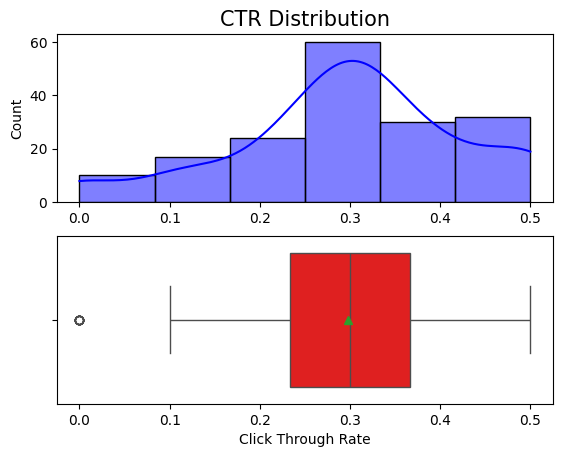

In [85]:
#CTR distribution
Histogram_Boxplots(Data_Agg, 'CTR', 'CTR Distribution', 'Click Through Rate', 'blue', 'red')

In [86]:
#Bid success distribution

In [87]:
#Margin_Cost_Distribution

<ipython-input-84-1c96bd523f7b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= dataset[variable], palette= 'bright')


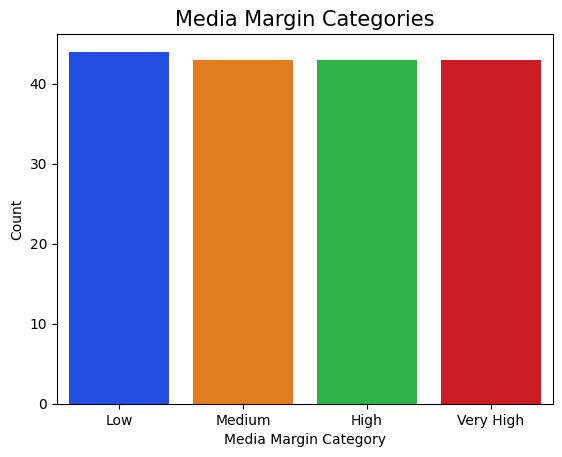

In [88]:
#Media_Margin Categories
univariate_countplot(Data_Agg, 'media_margin_category', 'Media Margin Categories', 'Media Margin Category', 'Count', 'blue')

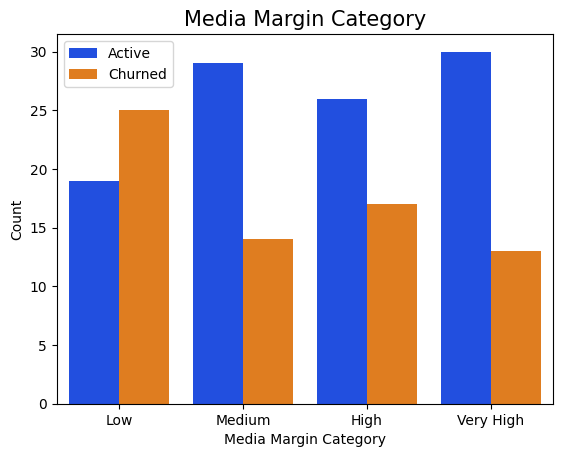

In [89]:
multivariate_countplot(Data_Agg, 'media_margin_category', 'churned_category', 'Media Margin Category', 'Media Margin Category', 'Count', 'blue')

In [90]:
ct = pd.crosstab(Data_Agg['media_margin_category'], Data_Agg['churned_category'], margins = True)

ct['churned_rate (%)'] = (ct['Churned']/ct['All']) * 100
ct

#ct['s'] = (ct['media_margin_category']/ct['All']) * 100


churned_category,Active,Churned,All,churned_rate (%)
media_margin_category,,,,
Low,19,25,44,56.82
Medium,29,14,43,32.56
High,26,17,43,39.53
Very High,30,13,43,30.23
All,104,69,173,39.88


<ipython-input-84-1c96bd523f7b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= dataset[variable1], y= dataset[variable2], palette= 'bright')


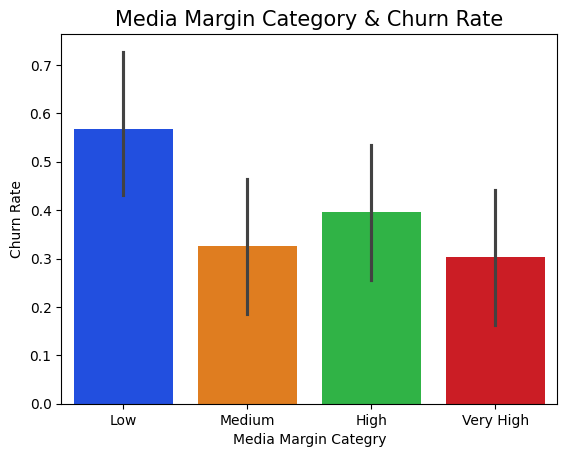

In [91]:
barplot(Data_Agg, 'media_margin_category', 'churned', 'Media Margin Category & Churn Rate', 'Media Margin Categry', 'Churn Rate')

<ipython-input-92-13b5fd3f8042>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= Data_Agg['media_margin_category'], y= Data_Agg['churned'], palette= 'bright')


Text(0.5, 0, 'Media Margin Category')

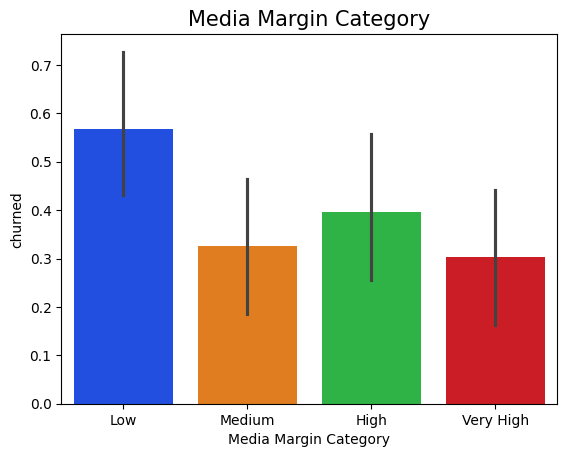

In [92]:
#barplot
sns.barplot(x= Data_Agg['media_margin_category'], y= Data_Agg['churned'], palette= 'bright')
plt.title('Media Margin Category', fontsize= 15)
plt.xlabel('Media Margin Category', fontsize= 10)

Despite the Media Margin category fairly equal in terms population. The lowest quartile is an outlier in terms of performance.

It has a churn rate of over 50%. This is 10 percentage above the average churn rate and consequently may suggest that the Captify's least profitable customer are potentially the most likely to leave.

In [93]:
Data_Agg['CTR_cat'] = pd.qcut(Data_Agg['CTR'], q=4, labels= ['Low', 'Medium', 'High', 'Very High'], duplicates= 'drop')
# The duplicates='drop' argument tells pd.qcut to drop duplicate bin edges
# This ensures that the resulting categories are still meaningful and avoids the ValueError.

c = pd.crosstab(Data_Agg['CTR_cat'], Data_Agg['churned_category'], margins=True, dropna=True)

c['churned_rate (%)'] = (c['Churned']/c['All']) * 100
c

churned_category,Active,Churned,All,churned_rate (%)
CTR_cat,,,,
Low,22,24,46,52.17
Medium,29,13,42,30.95
High,33,9,42,21.43
Very High,20,23,43,53.49
All,104,69,173,39.88


Using Correlation plot to evaluate the relation of correlation between Media Margin

In [94]:
#cross tab vtr and churn

Data_Agg['VTR_cat'] = pd.qcut(Data_Agg['VTR'], q=4, labels= ['Low', 'Medium', 'High'], duplicates= 'drop')

c =pd.crosstab(Data_Agg['VTR_cat'], Data_Agg['churned_category'], margins=True, dropna=True)
c['churned_rate (%)'] = (c['Churned']/c['All']) * 100
c
#

churned_category,Active,Churned,All,churned_rate (%)
VTR_cat,,,,
Low,47,44,91,48.35
Medium,30,10,40,25.00
High,27,15,42,35.71
All,104,69,173,39.88


In [95]:
Data_Agg['vertical']= Data_Agg['vertical'].astype('string')
c =pd.crosstab(Data_Agg['vertical'], Data_Agg['churned_category'], margins=True, dropna=True)
c['churned_rate (%)'] = (c['Churned']/c['All']) * 100
c

churned_category,Active,Churned,All,churned_rate (%)
vertical,,,,
Alcohol,7,4,11,36.36
Automotive,6,5,11,45.45
Charity,8,5,13,38.46
Finance,4,7,11,63.64
Food and Drink,5,5,10,50.00
Gambling,8,5,13,38.46
Home and Garden,3,6,9,66.67
Jobs and Education,7,5,12,41.67
Law and Government,11,7,18,38.89


In [96]:
c =pd.crosstab(Data_Agg['vertical'], Data_Agg['churned_category'], margins=True, dropna=True)
c['churned_rate (%)'] = (c['Churned']/c['All']) * 100
c

churned_category,Active,Churned,All,churned_rate (%)
vertical,,,,
Alcohol,7,4,11,36.36
Automotive,6,5,11,45.45
Charity,8,5,13,38.46
Finance,4,7,11,63.64
Food and Drink,5,5,10,50.00
Gambling,8,5,13,38.46
Home and Garden,3,6,9,66.67
Jobs and Education,7,5,12,41.67
Law and Government,11,7,18,38.89


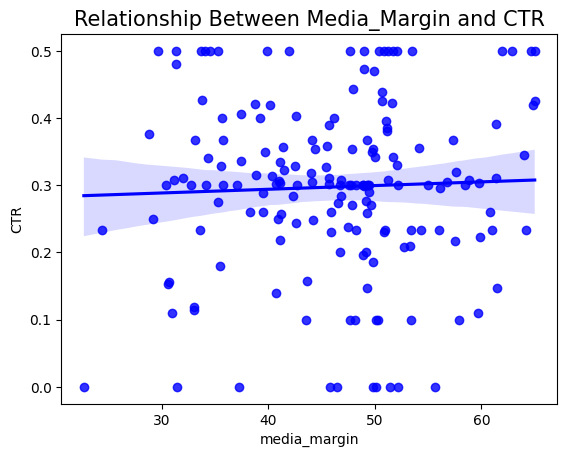

In [97]:
correlation_plot(Data_Agg, 'Relationship Between Media_Margin and CTR', 'media_margin', 'CTR', 'blue')

The relationship here is a t best almost non-existent. This refutes the initial hypotheses that the media margin has an impact on CTR.

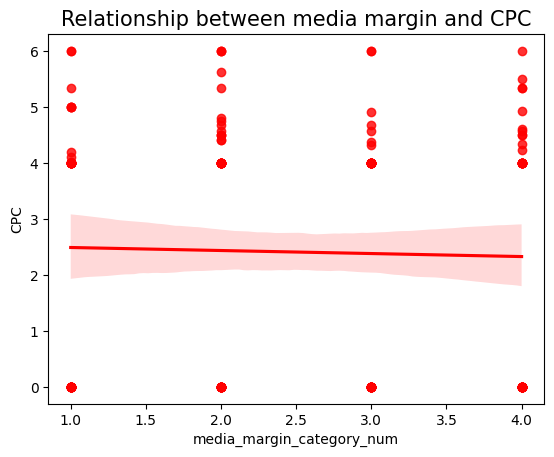

In [98]:
correlation_plot(Data_Agg, 'Relationship between media margin and CPC', 'media_margin_category_num', 'CPC', 'red' )

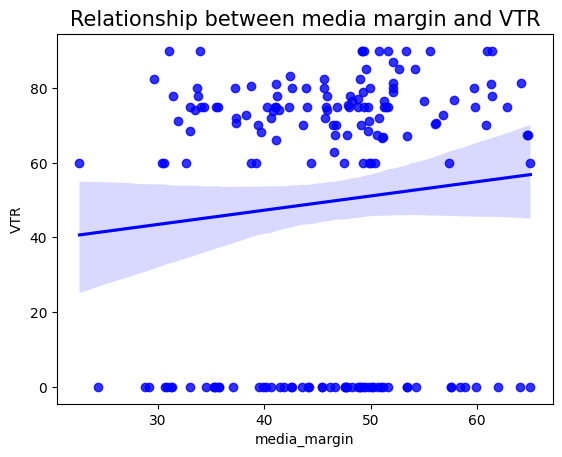

In [99]:
correlation_plot(Data_Agg, 'Relationship between media margin and VTR', 'media_margin', 'VTR', 'blue')

In [100]:
c =pd.crosstab(Data_Agg['tier'], Data_Agg['churned_category'], margins=True, dropna=True)
c['churned_rate (%)'] = (c['Churned']/c['All']) * 100
c

churned_category,Active,Churned,All,churned_rate (%)
tier,,,,
Below Minimum Threshold,36,29,65,44.62
Growth Tier,30,20,50,40.00
Mid-Tier,25,13,38,34.21
White Glove,13,7,20,35.00
All,104,69,173,39.88


In [101]:
control = Data_Agg[Data_Agg['churned_category'] == 'Active']
treatment = Data_Agg[Data_Agg['churned_category'] == 'Churned']

t1 = treatment[treatment['media_margin_category_num']== 4]

print(t1)

         advertiser segment_type            vertical                     tier media_type       Date  gross_spend  media_cost  data_revenue  impressions  video_completes  clicks  media_margin  CPC  CTR   VTR     bid_request           bids  bid_success_rate  months_since_last_transaction  churned churned_category media_margin_category media_margin_category_num  growth_tier_num  segment_type_num  Gross_Spend_Per_Click GSPC_Category    CTR_cat VTR_cat
29   Advertiser_128   Cookieless              Retail  Below Minimum Threshold      Video 2024-04-01      5844.30     2796.98        340.06     49441.33          2401.20  657.00         52.13 0.00 0.00 80.00  82263242373.00           0.00              0.00                          11.90        1          Churned             Very High                         4                0                 1                   8.90     Very High        Low    High
40   Advertiser_138   Cookieless   Style and Fashion  Below Minimum Threshold      Video 2024-07

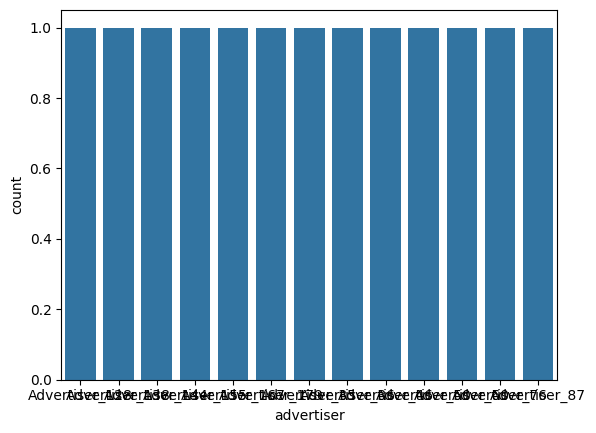

<Figure size 2000x10000 with 0 Axes>

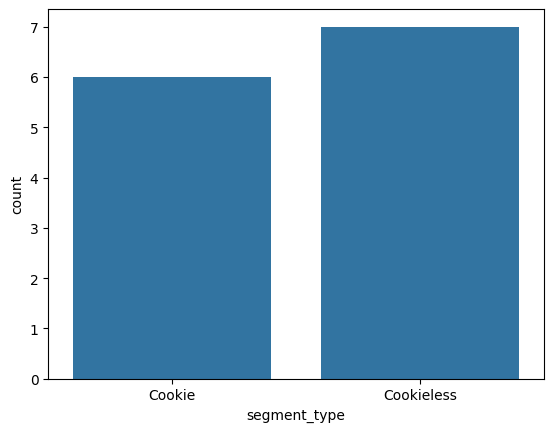

<Figure size 2000x10000 with 0 Axes>

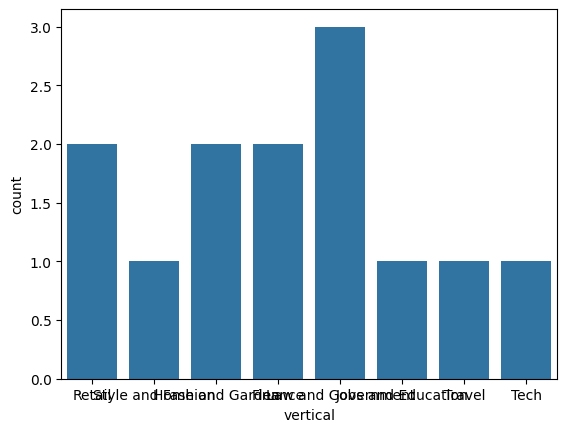

<Figure size 2000x10000 with 0 Axes>

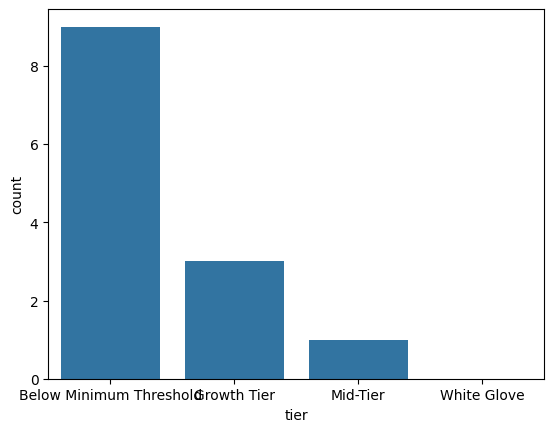

<Figure size 2000x10000 with 0 Axes>

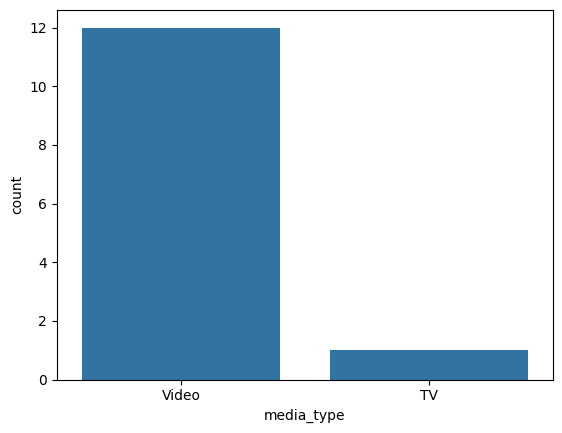

<Figure size 2000x10000 with 0 Axes>

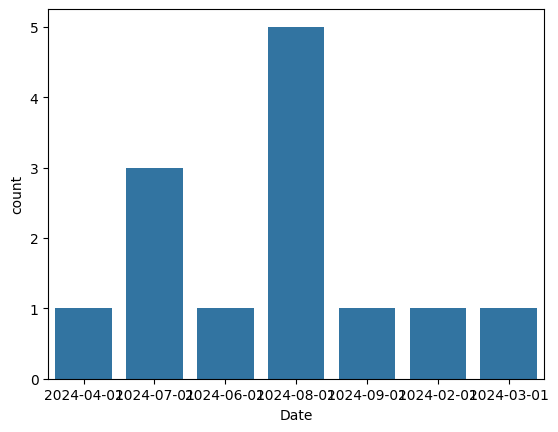

<Figure size 2000x10000 with 0 Axes>

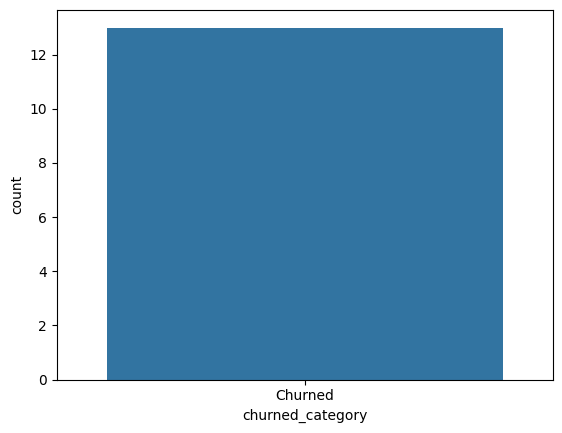

<Figure size 2000x10000 with 0 Axes>

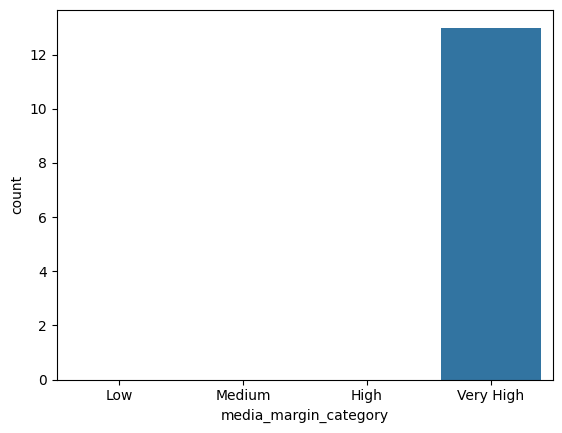

<Figure size 2000x10000 with 0 Axes>

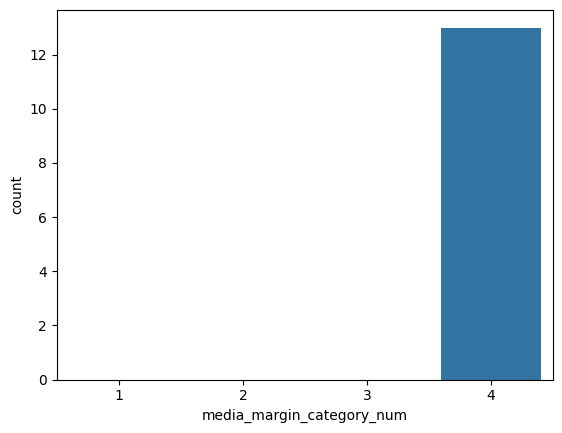

<Figure size 2000x10000 with 0 Axes>

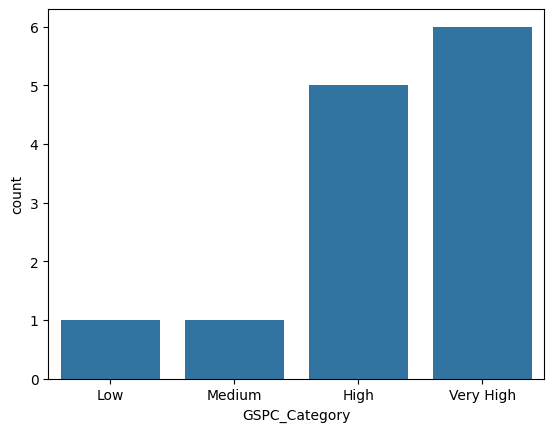

<Figure size 2000x10000 with 0 Axes>

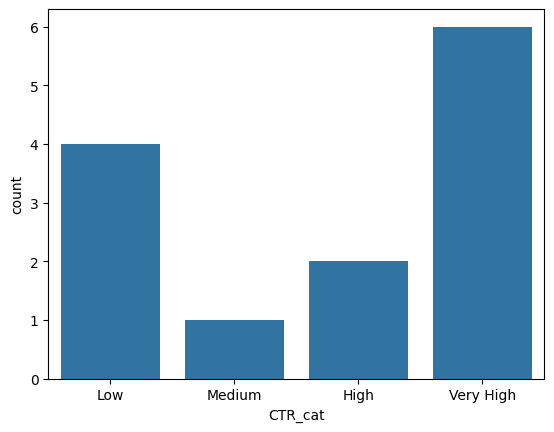

<Figure size 2000x10000 with 0 Axes>

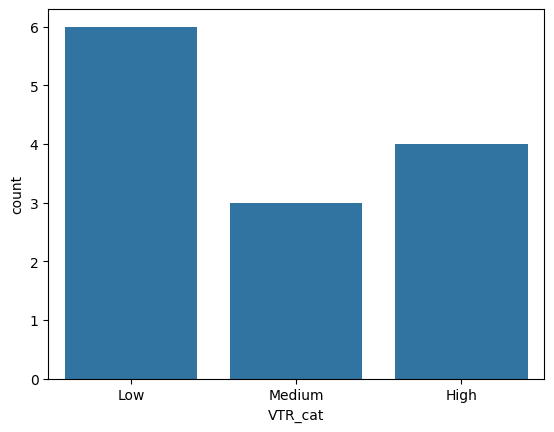

<Figure size 2000x10000 with 0 Axes>

In [102]:
colo = t1.select_dtypes(exclude = np.number)

for col in colo:
  sns.countplot(x= colo[col])
  plt.figure(figsize=(20,100))
  plt.show()

         advertiser segment_type            vertical                     tier media_type       Date  gross_spend  media_cost  data_revenue  impressions  video_completes  clicks  media_margin  CPC  CTR   VTR     bid_request           bids  bid_success_rate  months_since_last_transaction  churned churned_category media_margin_category media_margin_category_num  growth_tier_num  segment_type_num  Gross_Spend_Per_Click GSPC_Category    CTR_cat VTR_cat
9    Advertiser_107   Cookieless      Food and Drink              Growth Tier    Display 2024-07-01      1166.25      818.67         86.90     70209.00         18339.50  811.35         29.18 4.00 0.25  0.00  25206208560.00  1181148885.00              0.02                           8.80        1          Churned                   Low                         1                1                 1                   1.44          High     Medium     Low
10   Advertiser_108       Cookie             Finance  Below Minimum Threshold      Video 2024-08

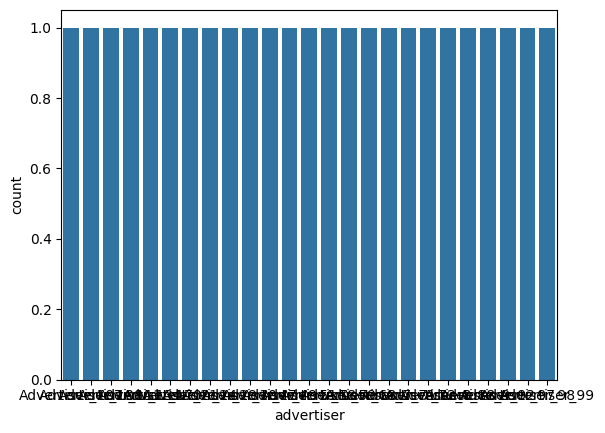

<Figure size 2000x10000 with 0 Axes>

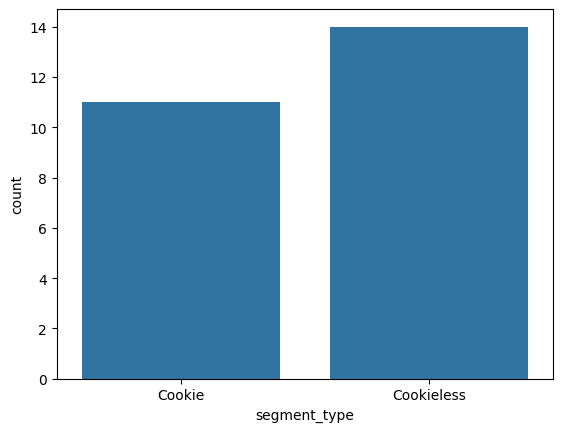

<Figure size 2000x10000 with 0 Axes>

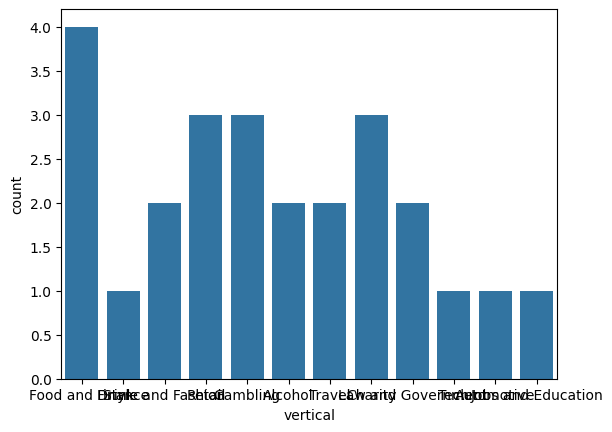

<Figure size 2000x10000 with 0 Axes>

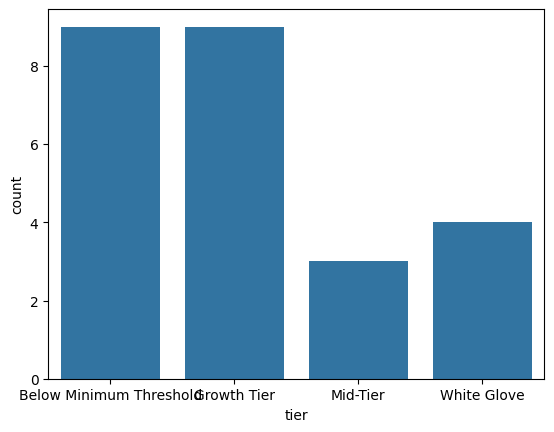

<Figure size 2000x10000 with 0 Axes>

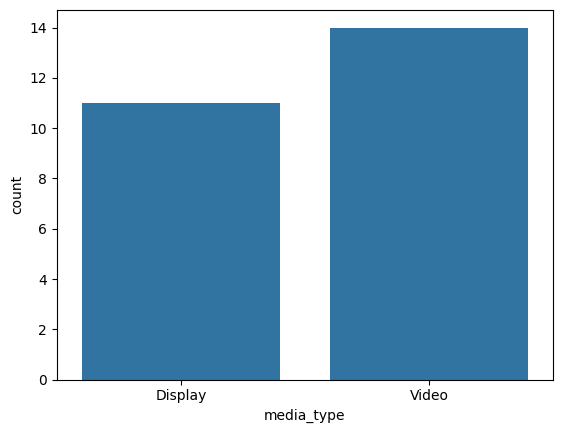

<Figure size 2000x10000 with 0 Axes>

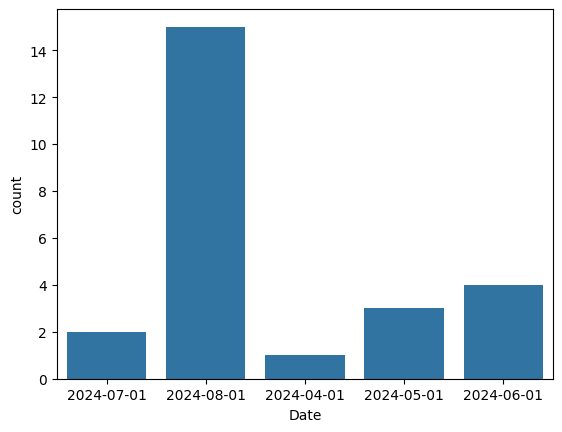

<Figure size 2000x10000 with 0 Axes>

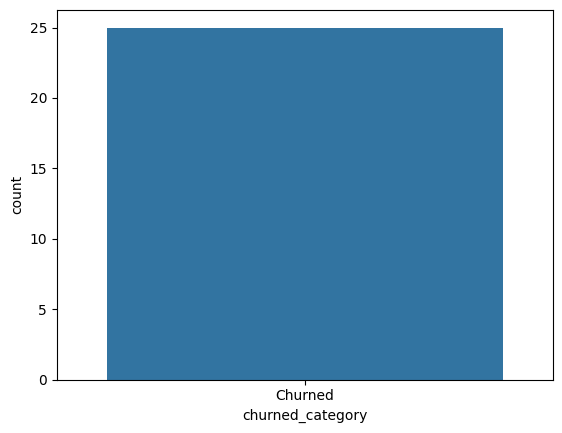

<Figure size 2000x10000 with 0 Axes>

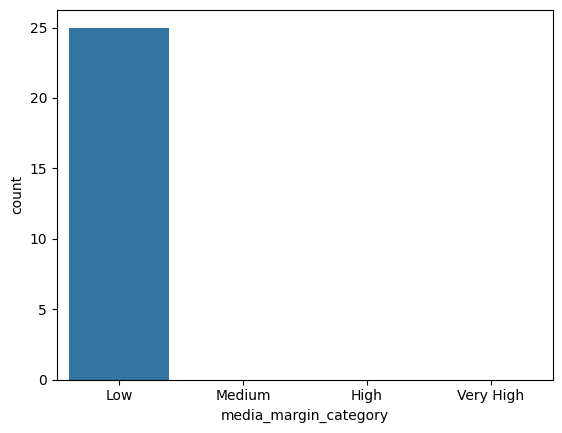

<Figure size 2000x10000 with 0 Axes>

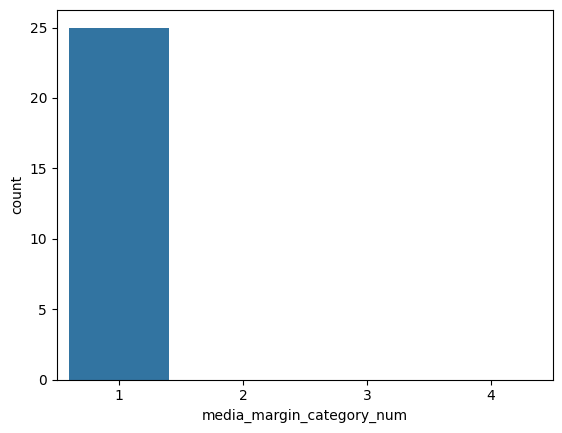

<Figure size 2000x10000 with 0 Axes>

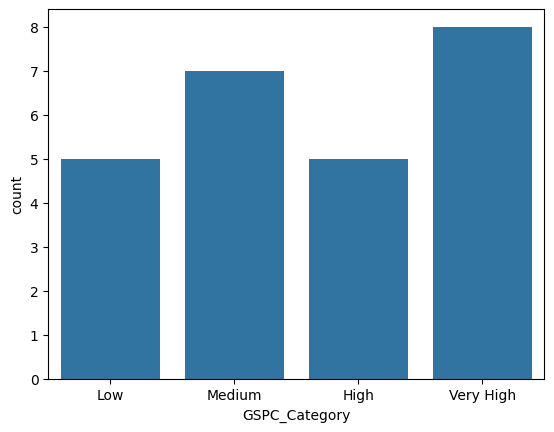

<Figure size 2000x10000 with 0 Axes>

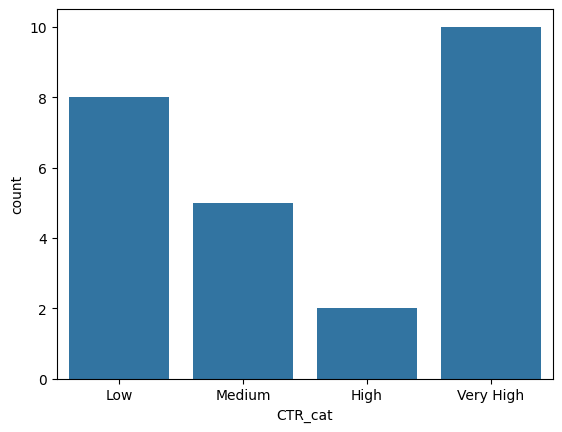

<Figure size 2000x10000 with 0 Axes>

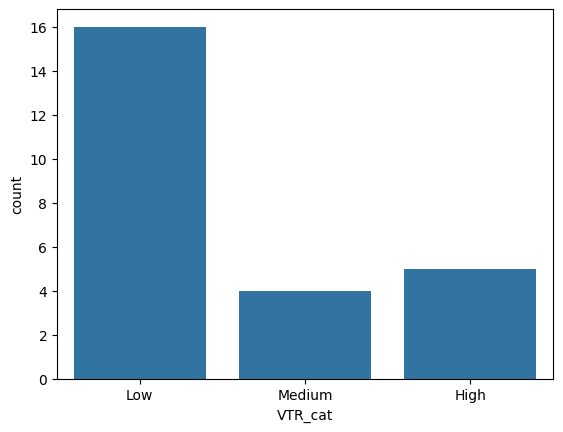

<Figure size 2000x10000 with 0 Axes>

In [103]:
t3 = treatment[treatment['media_margin_category_num']== 3]

t1 = treatment[treatment['media_margin_category_num']== 1]

print(t1)

colo = t1.select_dtypes(exclude = np.number)

for col in colo:
  sns.countplot(x= t1[col])
  plt.figure(figsize=(20,100))
  plt.show()

#t2 = treatment[treatment['media_margin_category_num']== 1]


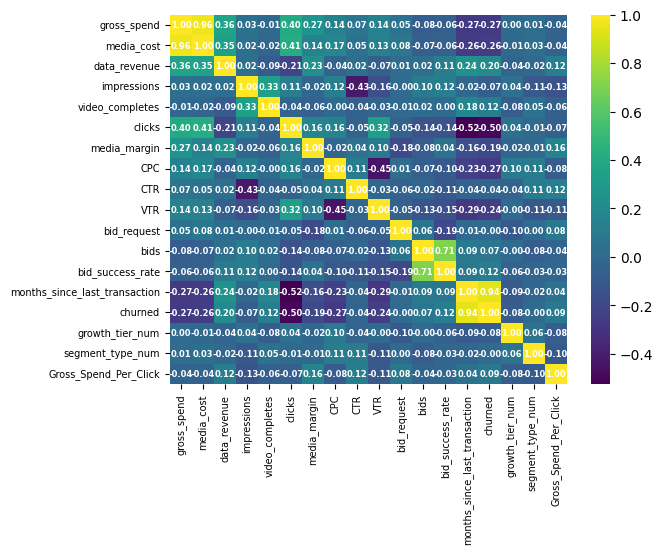

<Figure size 20000x10000 with 0 Axes>

In [104]:
NUM_DATA = Data_Agg.select_dtypes(include = np.number)
sns.heatmap(NUM_DATA.corr(), annot= True, cmap= 'viridis', fmt= '.2f', annot_kws= {'color': 'white', 'fontsize': 6, 'fontweight': 'bold'})
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.figure(figsize=(200,100))
plt.show()


This heatmap depicts the relationship between media_margin and the various metric such as CPC, CTR and VTR

USING ANOVA to evaluate the impact of Media Margin on the KPIs

In [105]:
#import the necessart library

!pip install pingouin
import pingouin as pg

In [109]:
#Automating ANOVA tests

import pingouin as pg

def ANOVA(dataset, dependent_variable, independent_variable):
  aov = pg.anova(dv= dependent_variable, between= independent_variable, data= dataset, detailed= True)
  print('Analysis of Variance \n', aov, '\n')

  #pairwise analysis
  pt = pg.pairwise_tukey(dv= dependent_variable, between= independent_variable, data= dataset)
  print('Pairwise Analysis \n', pt, '\n')


In [123]:

from scipy import stats
def chi_square(dataset, col1, col2): # Moved the chi_square function out of ANOVA
  contingency_table = pd.crosstab(dataset[col1], dataset[col2])
  chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
  print(f"Chi-square statistic: {chi2}")
  print(f"P-value: {p}")
  print(f"Degrees of freedom: {dof}")
  print("Expected frequencies:")
  print(expected, '\n')
  if p < 0.05:
    print("Reject the null hypothesis. There is a significant association between the variables.")
  else:
    print("Fail to reject the null hypothesis. There is no significant association between the variables.")

In [141]:
#Automating A/B Test

def a_b_test(dataset, target_variable, independent_variable):
  contingency_table = pd.crosstab(index= target_variable, columns= independent_variable)
  print(contingency_table, '\n')
  chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
  print(f"Chi-square statistic: {chi2}")
  print(f"P-value: {(p)}")
  print(f"Degrees of freedom: {dof}")
  print("Expected frequencies:")
  print(expected, '\n')
  if p < 0.05:
    print("Reject the null hypothesis. There is a stattistically significant association between the variables.")

  else:
    print('Fail to reject the null hypothesis. There is no statistically significant association between the variables.')


In [142]:
a_b_test(Data_Agg, 'segment_type', 'CTR')

ValueError: If using all scalar values, you must pass an index

In [137]:
chi_square(Data_Agg, 'media_margin_category', 'churned_category')

Chi-square statistic: 7.897721601367961
P-value: 0.04817346783068544
Degrees of freedom: 3
Expected frequencies:
[[26.45086705 17.54913295]
 [25.84971098 17.15028902]
 [25.84971098 17.15028902]
 [25.84971098 17.15028902]] 

Reject the null hypothesis. There is a significant association between the variables.


In [133]:
a_b_test(Data_Agg, 'segment_type', 'churned')

Chi-square statistic: 0.0
P-value: 1.0
Degrees of freedom: 1
Expected frequencies:
[[39.07514451 25.92485549]
 [64.92485549 43.07514451]] 

Fail to reject the null hypothesis. There is no statistically significant association between the variables.


In [ ]:
#Testing whether media_margin_category has a statistically significant impact on CTR

ANOVA(Data_Agg, 'CTR', 'media_margin_category')

In [ ]:
#Testing whether media margin has a statistically signifcant impact on VTR

ANOVA(Data_Agg, 'VTR', 'media_margin_category')

In [ ]:
#Testing whether Media Margin has a statistically significant impact on bid_sucess
ANOVA(Data_Agg, 'bid_success_rate', 'media_margin_category')

Based on the p - value (Threshold for statistical significance) for all three tests. Media margin does not have statistically signifcant impact on the

In [ ]:
ANOVA(Data_Agg, 'CTR', 'tier')

Regression Analysis - Finding out what drives the KPIs

In [ ]:
#def MLR(dataset, target_variable):


ML model - Finding out what put the KPI above average